In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
data_csv = pd.read_csv('./flights.csv',usecols=[2])

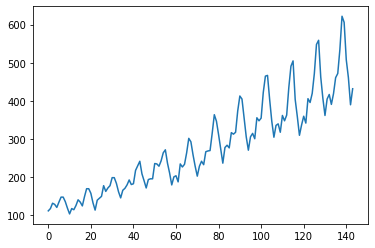

In [23]:
plt.plot(data_csv)

In [24]:
data_csv

,passengers
0,112
1,118
2,132
3,129
4,121
5,135
6,148
7,148
8,136
9,119


In [28]:
# 数据预处理
data_csv = data_csv.dropna()  # 滤除缺失数据
dataset = data_csv.values   # 获得csv的值
dataset = dataset.astype('float32')
max_value = np.max(dataset)  # 获得最大值
min_value = np.min(dataset)  # 获得最小值
scalar = max_value - min_value  # 获得间隔数量
dataset = list(map(lambda x: x / scalar, dataset)) # 归一化

In [29]:
dataset

[array([0.21621622], dtype=float32),
 array([0.22779922], dtype=float32),
 array([0.25482625], dtype=float32),
 array([0.24903475], dtype=float32),
 array([0.23359074], dtype=float32),
 array([0.26061776], dtype=float32),
 array([0.2857143], dtype=float32),
 array([0.2857143], dtype=float32),
 array([0.26254827], dtype=float32),
 array([0.22972973], dtype=float32),
 array([0.2007722], dtype=float32),
 array([0.22779922], dtype=float32),
 array([0.22200772], dtype=float32),
 array([0.24324325], dtype=float32),
 array([0.27220076], dtype=float32),
 array([0.26061776], dtype=float32),
 array([0.24131274], dtype=float32),
 array([0.28764477], dtype=float32),
 array([0.32818532], dtype=float32),
 array([0.32818532], dtype=float32),
 array([0.30501932], dtype=float32),
 array([0.25675675], dtype=float32),
 array([0.22007722], dtype=float32),
 array([0.27027026], dtype=float32),
 array([0.27992278], dtype=float32),
 array([0.28957528], dtype=float32),
 array([0.34362933], dtype=float32),
 arr

In [31]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# 创建好输入输出
data_X, data_Y = create_dataset(dataset)

In [32]:
data_X, data_Y

(array([[[0.21621622],
         [0.22779922]],
 
        [[0.22779922],
         [0.25482625]],
 
        [[0.25482625],
         [0.24903475]],
 
        [[0.24903475],
         [0.23359074]],
 
        [[0.23359074],
         [0.26061776]],
 
        [[0.26061776],
         [0.2857143 ]],
 
        [[0.2857143 ],
         [0.2857143 ]],
 
        [[0.2857143 ],
         [0.26254827]],
 
        [[0.26254827],
         [0.22972973]],
 
        [[0.22972973],
         [0.2007722 ]],
 
        [[0.2007722 ],
         [0.22779922]],
 
        [[0.22779922],
         [0.22200772]],
 
        [[0.22200772],
         [0.24324325]],
 
        [[0.24324325],
         [0.27220076]],
 
        [[0.27220076],
         [0.26061776]],
 
        [[0.26061776],
         [0.24131274]],
 
        [[0.24131274],
         [0.28764477]],
 
        [[0.28764477],
         [0.32818532]],
 
        [[0.32818532],
         [0.32818532]],
 
        [[0.32818532],
         [0.30501932]],
 
        [[0.30501932

In [34]:
# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [39]:
import torch

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)


train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)
test_y = torch.from_numpy(test_Y)

ValueError: cannot reshape array of size 43 into shape (1,2)

In [38]:
test_x

tensor([[[0.6718, 0.6853]],

        [[0.6853, 0.8147]],

        [[0.8147, 0.8977]],

        [[0.8977, 0.9015]],

        [[0.9015, 0.7799]],

        [[0.7799, 0.6699]],

        [[0.6699, 0.5888]],

        [[0.5888, 0.6486]],

        [[0.6486, 0.6564]],

        [[0.6564, 0.6139]],

        [[0.6139, 0.6988]],

        [[0.6988, 0.6718]],

        [[0.6718, 0.7008]],

        [[0.7008, 0.8398]],

        [[0.8398, 0.9479]],

        [[0.9479, 0.9749]],

        [[0.9749, 0.7799]],

        [[0.7799, 0.6931]],

        [[0.6931, 0.5985]],

        [[0.5985, 0.6506]],

        [[0.6506, 0.6950]],

        [[0.6950, 0.6602]],

        [[0.6602, 0.7838]],

        [[0.7838, 0.7645]],

        [[0.7645, 0.8108]],

        [[0.8108, 0.9112]],

        [[0.9112, 1.0579]],

        [[1.0579, 1.0792]],

        [[1.0792, 0.8938]],

        [[0.8938, 0.7857]],

        [[0.7857, 0.6988]],

        [[0.6988, 0.7819]],

        [[0.7819, 0.8050]],

        [[0.8050, 0.7548]],

        [[0.75

In [ ]:
from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size=2,hidden_size=4,output_size=1,num_layer=2):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        x = self.layer2(x)
        x = x.view(s,b,-1)
        return x

model = lstm(2, 4,1,2)

In [ ]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [ ]:
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = model(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print(e)
    print(loss.data)
    
    if (e + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.data))

In [ ]:
model = model.eval() # 转换成测试模式

data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = model(var_data) # 测试集的预测结果
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()

In [ ]:
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [20]:
import datetime
import pytz
dt = datetime.datetime.strptime('2022-02-25 15:59:00 GMT-0500' , '%Y-%m-%d %H:%M:%S GMT%z')

ts = int(dt.timestamp())
t = datetime.datetime.fromtimestamp(ts, pytz.timezone('Asia/Shanghai')).strftime('%Y-%m-%d')

print(t)

2022-02-26


In [19]:
print(ts)

1645822740
